### Business Understanding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
## Input features : age,sex,bmi,children,smoker,region
## Target variable : charges


### Data Inspection

In [24]:
## Categorical and Numerical features

numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex ', 'smoker', 'region']

## We have categorical features to be encoded which cannot be used in multiple linear regression directly.


### Data Cleaning & Encoding

In [25]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])


After OneHotEncoding, feature shape: (1337, 11)

First 5 rows after encoding:
[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 28 33.0 3]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 33 22.705 0]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 32 28.88 0]]


In [6]:
df.isnull().sum()
## No missing values found


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)
## No duplicate values found

In [29]:
X,y

(array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
        [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
        [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
        ...,
        [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
        [1.0, 0.0, 1.0, ..., 21, 25.8, 0],
        [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

### Feature scaling and compatibility

In [ ]:
## Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
## Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


(array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
        [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
        [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
        ...,
        [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
        [1.0, 0.0, 1.0, ..., 21, 25.8, 0],
        [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object),
 array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]))

In [31]:
## Training the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)


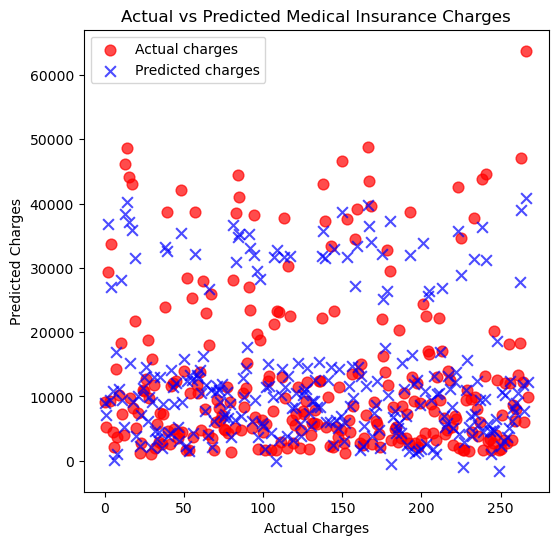

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual charges', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted charges', alpha=0.7, marker='x', s=60)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Insurance Charges")
plt.legend()
plt.show()


In [ ]:
# Coefficient Interpretation (MOST IMPORTANT)
feature_names = ct.get_feature_names_out()
coefficients = model.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
3,encoder__x4_yes,4779.240704
8,remainder__x0,3614.975415
9,remainder__x2,2036.228123
10,remainder__x3,516.890247
4,encoder__x5_northeast,199.698058
5,encoder__x5_northwest,38.734949
0,encoder__x1_female,4.646551
1,encoder__x1_male,-4.646551
6,encoder__x5_southeast,-86.621147
7,encoder__x5_southwest,-150.167101


In [19]:
# Strongest & Least Impact (Answer from Model)
coef_df.loc[coef_df['Coefficient'].idxmax()]
coef_df.loc[coef_df['Coefficient'].idxmin()]


Feature        encoder__x4_no
Coefficient      -4779.240704
Name: 2, dtype: object

### Multicollinearity 

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = range(X_train.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X_train, i)
                   for i in range(X_train.shape[1])]

vif_data


c:\Users\aksha\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,0,inf
1,1,inf
2,2,inf
3,3,inf
4,4,inf
5,5,inf
6,6,inf
7,7,inf
8,8,1.023084
9,9,1.094986
